In [1]:
using Distributions
using KernelDensity
using LinearAlgebra
dot2(x) = dot(x, x)
using Random
using StatsBase
using StatsPlots
default(fmt=:png, titlefontsize=8, tickfontsize=6, guidefontsize=8, legendfontsize=8)

In [2]:
Random.seed!(4649373)

TaskLocalRNG()

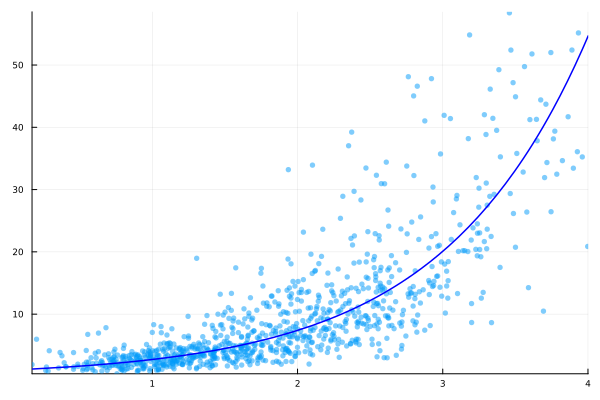

In [3]:
distx = Gamma(4, 0.5)
disty(x) = LogNormal(x, 0.5)
n = 1000

x = rand(distx, n)
y = @. rand(disty(x))

scatter(x, y; label="", msc=:auto, alpha=0.5, ms=3)
plot!(xlim=quantile.((x,), (0.0, 0.95)), ylim=quantile.((y,), (0.0, 0.95)))
plot!(exp; label="", c=:blue, lw=1.5)

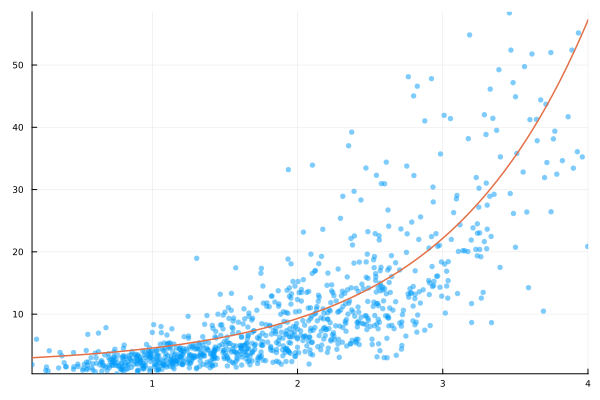

In [4]:
X = [ones(n) exp.(x)]
betahat0, betahat1 = X \ y

scatter(x, y; label="", msc=:auto, alpha=0.5, ms=3)
plot!(xlim=quantile.((x,), (0.0, 0.95)), ylim=quantile.((y,), (0.0, 0.95)))
plot!(x -> betahat0 + betahat1*exp(x); label="", lw=1.5)

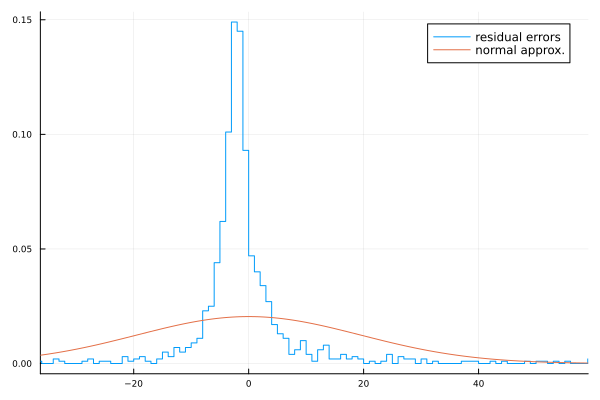

In [5]:
yhat = @. betahat0 + betahat1*exp(x)
uhat = y - yhat
normal = fit(Normal, uhat)

stephist(uhat; norm=true, label="residual errors")
plot!(xlim=quantile.((uhat,), (0.01, 0.99)))
plot!(normal; label="normal approx.")

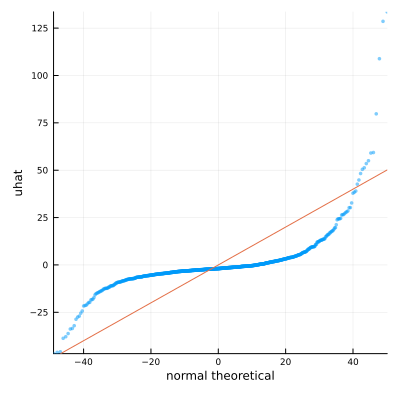

In [6]:
_ecdfuhat = ecdf(uhat)
ecdfuhat(x) = _ecdfuhat(x)
qnormal(x) = quantile(normal, ecdfuhat(x))
q = qnormal.(uhat)
scatter(q, uhat; label="", msc=:auto, alpha=0.5, ms=2)
plot!(identity; label="")
plot!(xguide="normal theoretical", yguide="uhat")
plot!(; xlim=quantile.((q,), (0.005, 0.995)), ylim=quantile.((uhat,), (0.005, 0.995)))
plot!(size=(400, 400))

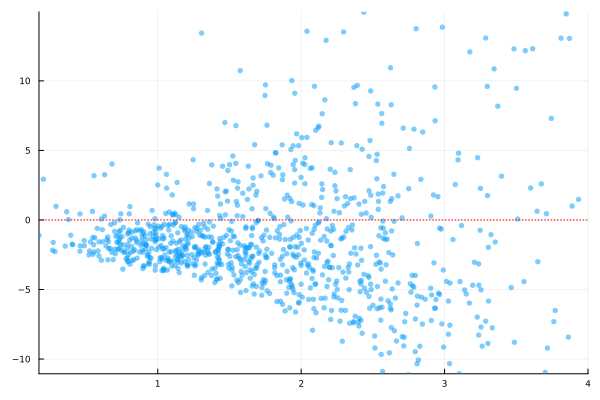

In [7]:
scatter(x, uhat; label="", msc=:auto, alpha=0.5, ms=3)
plot!(xlim=quantile.((x,), (0.0, 0.95)), ylim=quantile.((uhat,), (0.05, 0.95)))
hline!([0]; label="", c=:red, ls=:dot)

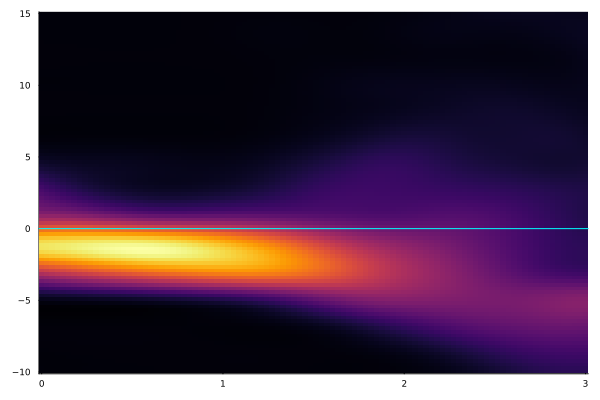

In [8]:
ikx = InterpKDE(kde(x))
ikxuhat = InterpKDE(kde((x, uhat)))
f(x, y) = pdf(ikxuhat, x, y)/ pdf(ikx, x)
xs = range(0, 3, 100)
ys = range(-10, 15, 100)
heatmap(xs, ys, f; colorbar=false)
hline!([0]; label="", c=:cyan)

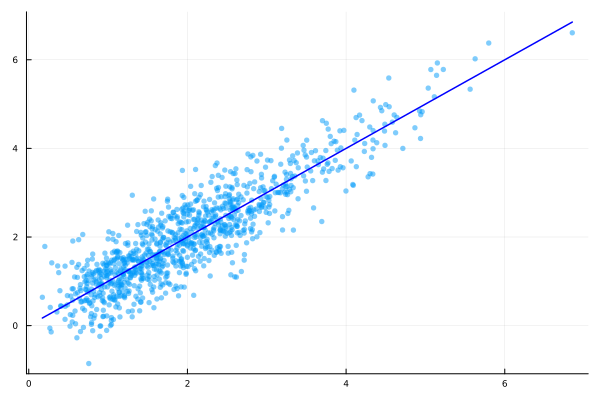

In [9]:
logy = @. log(y)

scatter(x, logy; label="", msc=:auto, alpha=0.5, ms=3)
plot!(identity; label="", c=:blue, lw=1.5)

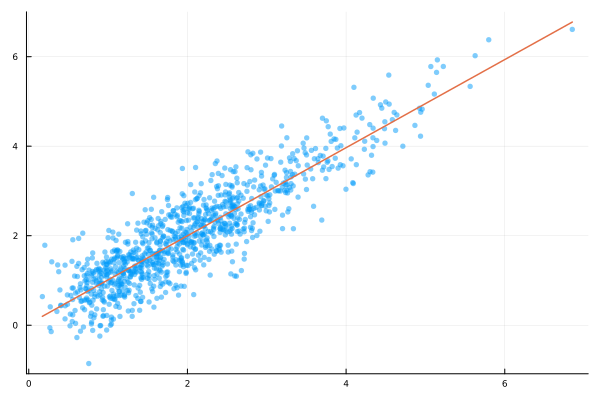

In [10]:
X = [ones(n) x]
betahat0, betahat1 = X \ logy

scatter(x, logy; label="", msc=:auto, alpha=0.5, ms=3)
plot!(x -> betahat0 + betahat1*x; label="", lw=1.5)

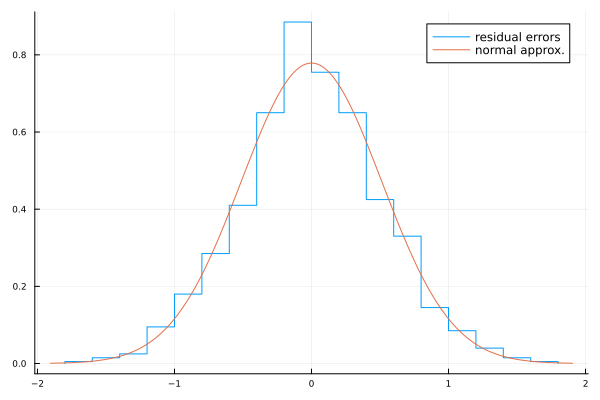

In [11]:
logyhat = @. betahat0 + betahat1*x
uhat = logy - logyhat
normal = fit(Normal, uhat)

stephist(uhat; norm=true, label="residual errors")
plot!(normal; label="normal approx.")

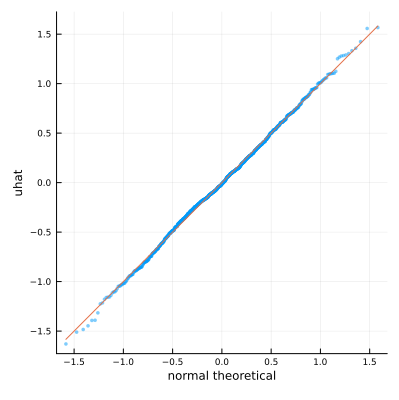

In [12]:
_ecdfuhat = ecdf(uhat)
ecdfuhat(x) = _ecdfuhat(x)
qnormal(x) = quantile(normal, ecdfuhat(x))
scatter(qnormal.(uhat), uhat; label="", msc=:auto, alpha=0.5, ms=2)
plot!(identity; label="")
plot!(xguide="normal theoretical", yguide="uhat")
plot!(size=(400, 400))

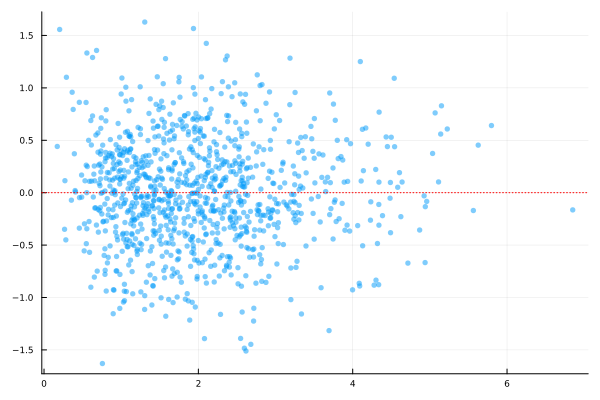

In [13]:
scatter(x, uhat; label="", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", c=:red, ls=:dot)

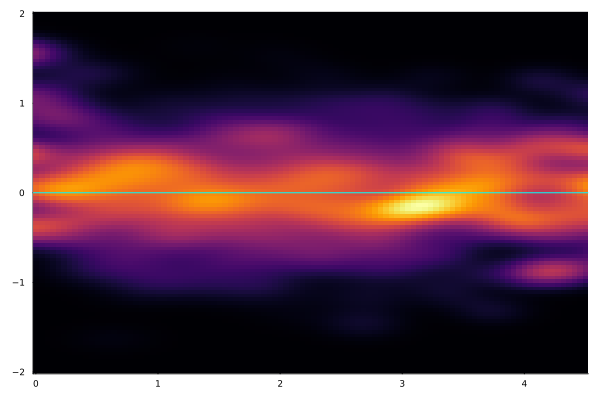

In [14]:
ikx = InterpKDE(kde(x))
ikxuhat = InterpKDE(kde((x, uhat)))
f(x, y) = pdf(ikxuhat, x, y)/ pdf(ikx, x)
xs = range(0, 4.5, 100)
ys = range(-2, 2, 100)
heatmap(xs, ys, f; colorbar=false)
hline!([0]; label="", c=:cyan)

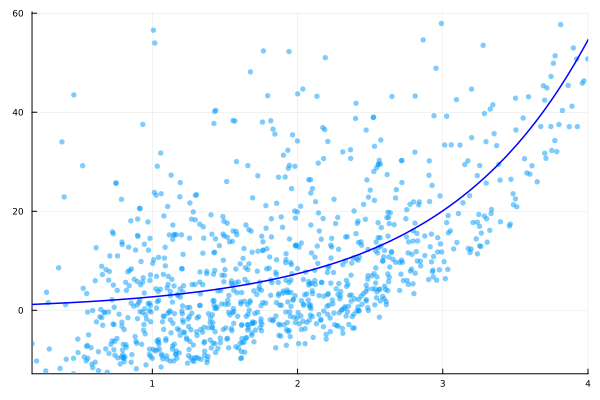

In [15]:
_distu = Gamma(1.5, 10)
distu = _distu - mean(_distu)
disty(x) = exp(x) + distu

y = @. rand(disty(x))

scatter(x, y; label="", msc=:auto, alpha=0.5, ms=3)
plot!(xlim=quantile.((x,), (0.0, 0.95)), ylim=quantile.((y,), (0.0, 0.95)))
plot!(exp; label="", c=:blue, lw=1.5)

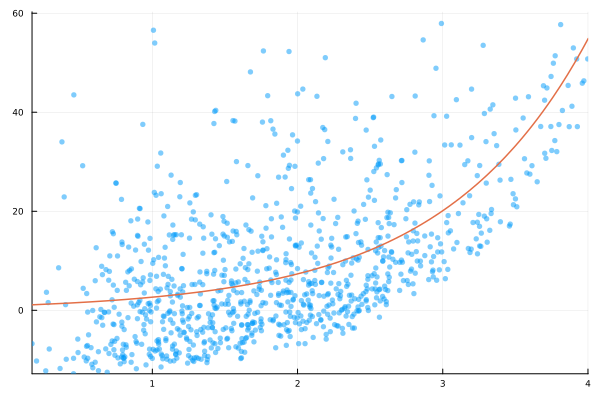

In [16]:
X = [ones(n) exp.(x)]
betahat0, betahat1 = X \ y

scatter(x, y; label="", msc=:auto, alpha=0.5, ms=3)
plot!(xlim=quantile.((x,), (0.0, 0.95)), ylim=quantile.((y,), (0.0, 0.95)))
plot!(x -> betahat0 + betahat1*exp(x); label="", lw=1.5)

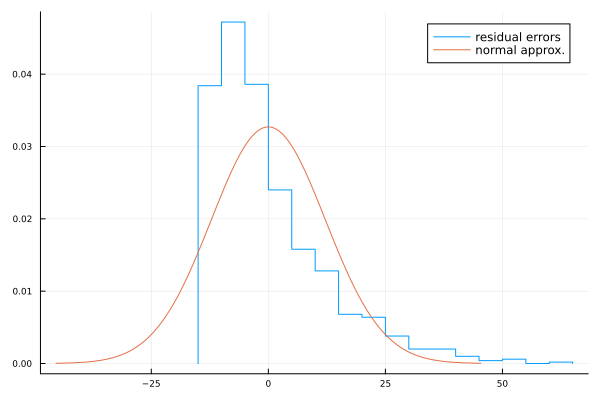

In [17]:
yhat = @. betahat0 + betahat1*exp(x)
uhat = y - yhat
normal = fit(Normal, uhat)

stephist(uhat; norm=true, label="residual errors")
plot!(normal; label="normal approx.")

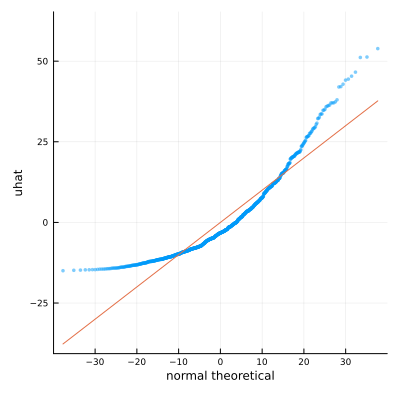

In [18]:
_ecdfuhat = ecdf(uhat)
ecdfuhat(x) = _ecdfuhat(x)
qnormal(x) = quantile(normal, ecdfuhat(x))
scatter(qnormal.(uhat), uhat; label="", msc=:auto, alpha=0.5, ms=2)
plot!(identity; label="")
plot!(xguide="normal theoretical", yguide="uhat")
plot!(size=(400, 400))

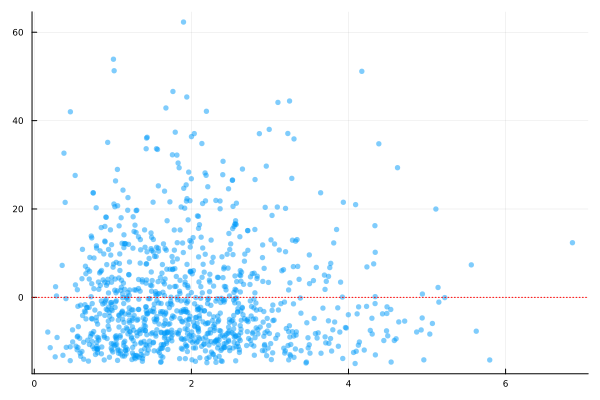

In [19]:
scatter(x, uhat; label="", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", c=:red, ls=:dot)

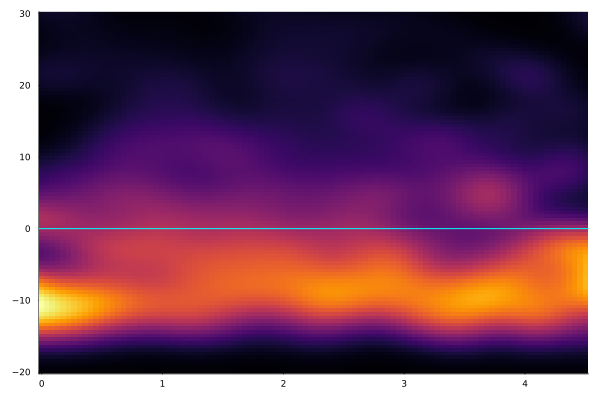

In [20]:
ikx = InterpKDE(kde(x))
ikxuhat = InterpKDE(kde((x, uhat)))
f(x, y) = pdf(ikxuhat, x, y)/ pdf(ikx, x)
xs = range(0, 4.5, 100)
ys = range(-20, 30, 100)
heatmap(xs, ys, f; colorbar=false)
hline!([0]; label="", c=:cyan)

In [21]:
Random.seed!(4649373)

TaskLocalRNG()

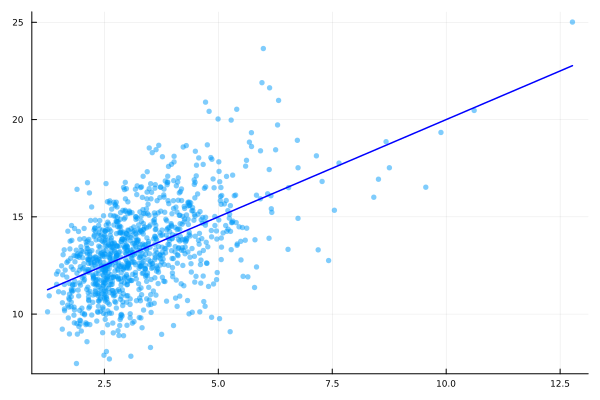

In [22]:
distx = InverseGamma(10, 30)
distv(x) = Normal(10 + x, √x)
n = 1000

x = rand(distx, n)
y = @. rand(distv(x))

scatter(x, y; label="", msc=:auto, alpha=0.5, ms=3)
plot!(x -> 10 + x; label="", c=:blue, lw=1.5)

(betahat0, betahat1) = X \ y = [9.963631250848664, 1.0122151497320304]


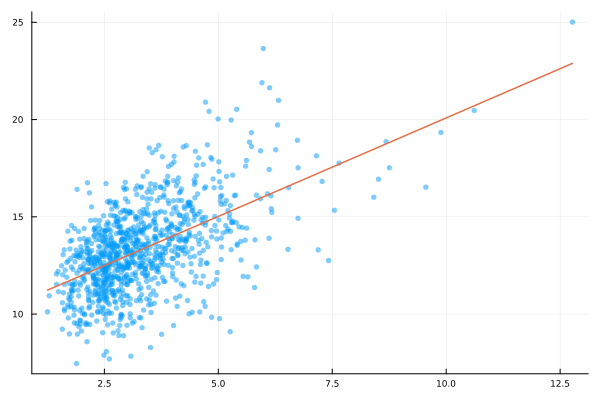

In [23]:
X = [ones(n) x]
@show betahat0, betahat1 = X \ y

scatter(x, y; label="", msc=:auto, alpha=0.5, ms=3)
plot!(x -> betahat0 + betahat1*x; label="", lw=1.5)

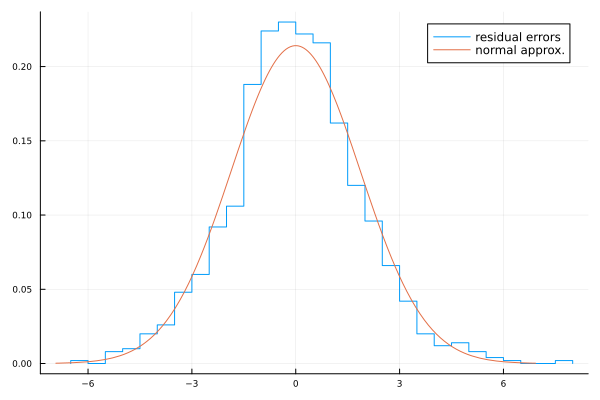

In [24]:
yhat = @. betahat0 + betahat1*x
uhat = y - yhat
normal = fit(Normal, uhat)

stephist(uhat; norm=true, label="residual errors")
plot!(normal; label="normal approx.")

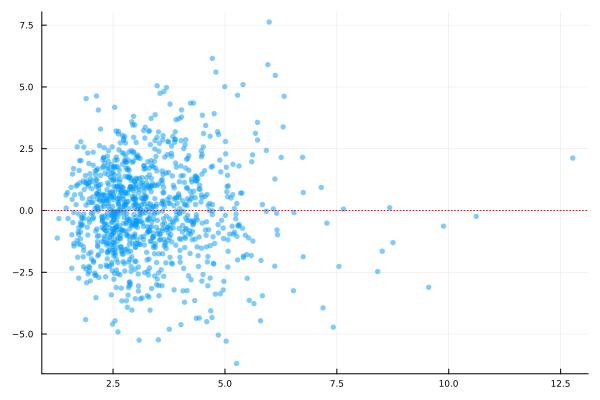

In [25]:
scatter(x, uhat; label="", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", c=:red, ls=:dot)

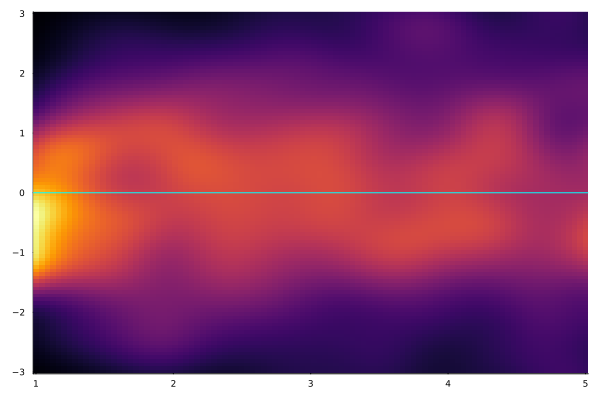

In [26]:
ikx = InterpKDE(kde(x))
ikxuhat = InterpKDE(kde((x, uhat)))
f(x, y) = pdf(ikxuhat, x, y)/ pdf(ikx, x)
xs = range(1, 5, 100)
ys = range(-3, 3, 100)
heatmap(xs, ys, f; colorbar=false)
hline!([0]; label="", c=:cyan)

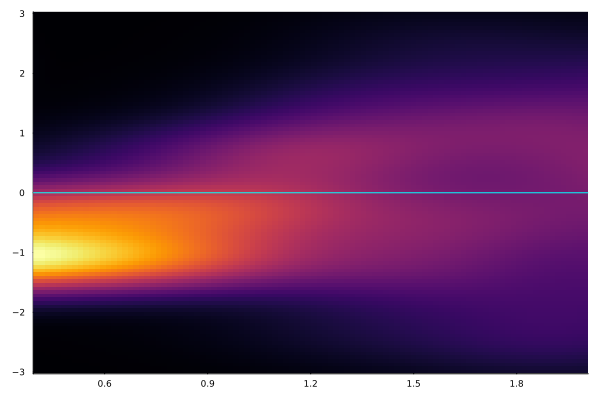

In [27]:
ikx = InterpKDE(kde(x))
ikxuhat = InterpKDE(kde((x, uhat)))
f(x, y) = pdf(ikxuhat, x, y)/ pdf(ikx, x)
xs = range(0.4, 2, 100)
ys = range(-3, 3, 100)
heatmap(xs, ys, f; colorbar=false)
hline!([0]; label="", c=:cyan)